<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#K-means聚类" data-toc-modified-id="K-means聚类-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>K-means聚类</a></span><ul class="toc-item"><li><span><a href="#对比init='random';init='k-means++'" data-toc-modified-id="对比init='random';init='k-means++'-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>对比init='random';init='k-means++'</a></span></li><li><span><a href="#对比n_init=1;n_init=10" data-toc-modified-id="对比n_init=1;n_init=10-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>对比n_init=1;n_init=10</a></span></li><li><span><a href="#轮廓系数" data-toc-modified-id="轮廓系数-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>轮廓系数</a></span></li><li><span><a href="#确定K值" data-toc-modified-id="确定K值-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>确定K值</a></span></li></ul></li><li><span><a href="#图像的矢量化（案例）" data-toc-modified-id="图像的矢量化（案例）-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>图像的矢量化（案例）</a></span></li><li><span><a href="#基于密度的聚类算法：DBSCAN" data-toc-modified-id="基于密度的聚类算法：DBSCAN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>基于密度的聚类算法：DBSCAN</a></span></li><li><span><a href="#相似度和相异性的度量（补充）" data-toc-modified-id="相似度和相异性的度量（补充）-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>相似度和相异性的度量（补充）</a></span><ul class="toc-item"><li><span><a href="#单个属性的对象之间的相似度和相异度" data-toc-modified-id="单个属性的对象之间的相似度和相异度-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>单个属性的对象之间的相似度和相异度</a></span></li></ul></li></ul></div>

- 聚类分析是将数据划分成有意义或有用的组；捕获数据的自然结构

- 聚类分析的分析目标：组内差异小，组间差异大

# K-means聚类

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
centers=[[-1,-4],[-1,4],[1,-4],[1,4]]
X,y=make_blobs(n_samples=160,centers=centers,random_state=420)
#创建模拟数据

## 对比init='random';init='k-means++'

- sklearn的K-means自带防止局部最优的策略：1.初始簇中心相聚远 2.多次聚类找到最优

- 这里特意不用自带的这些策略，以查看K-means算法的缺陷

364.1446805357918


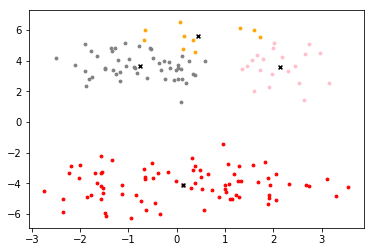

In [3]:
n_clusters=4
kmeans=KMeans(n_clusters=n_clusters,init='random',n_init=1,random_state=420).fit(X)
#构建K-means聚类，4个聚类中心，随机选择初始中心，聚类1次
y_pred=kmeans.predict(X)
#返回对X聚类的预测结果

print(kmeans.inertia_)
#查看模型每个点到聚类中心的距离平方和

c=kmeans.cluster_centers_
#返回聚类中心大坐标

#kmeans.labels_
#y_pred=kmeans.predict(X)

color=["red","pink","orange","gray"]
for i in range(n_clusters):
    plt.scatter(X[y_pred==i, 0], X[y_pred==i, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=color[i]
           )
plt.scatter(c[:,0],c[:,1]
           ,marker="x"
           ,s=15
           ,c="black")

255.64907738615466


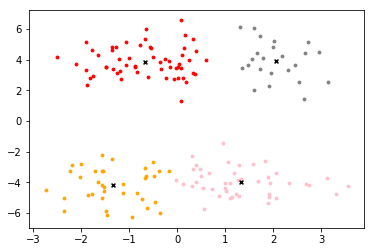

In [4]:
n_clusters=4
cluster=KMeans(n_clusters=n_clusters,random_state=420,init='k-means++',n_init=1).fit(X)
inertia_=cluster.inertia_
print(inertia_)

c=cluster.cluster_centers_

y_pred=cluster.labels_

color = ["red","pink","orange","gray",'purple']
for i in range(n_clusters):
    plt.scatter(X[y_pred==i, 0], X[y_pred==i, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=color[i]
           )
plt.scatter(c[:,0],c[:,1]
           ,marker="x"
           ,s=15
           ,c="black")

## 对比n_init=1;n_init=10

255.56331654978885


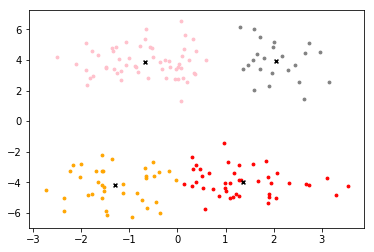

In [5]:
n_clusters=4
cluster=KMeans(n_clusters=n_clusters,random_state=420,init='k-means++',n_init=10).fit(X)
inertia_=cluster.inertia_
print(inertia_)

c=cluster.cluster_centers_

y_pred=cluster.labels_

color = ["red","pink","orange","gray",'purple']
for i in range(n_clusters):
    plt.scatter(X[y_pred==i, 0], X[y_pred==i, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=color[i]
           )
plt.scatter(c[:,0],c[:,1]
           ,marker="x"
           ,s=15
           ,c="black")

- KMeans参数:
    - n_clusters:簇个数,
    - init:默认"k-means++",初始化的中心点彼此距离尽可能远,会加速收敛防止局部最优;可以是"random"表示随机选择初始中心点,也可以自定义
    - n_init:默认为10,算法使用不同中心点计算的次数,最终结果是表现最好的输出
    - max_iter:每次计算的最大迭代次数,默认100
    - random_state:随机数种子
    - 其他参数[参考](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
- 输出结果包含的属性:
    - cluster_centers:返回聚类中心的坐标
    - labels_:每个点的标签
    - inertia_:每个点到对应簇中心的距离平方和
    - n_iter_:迭代次数

## 轮廓系数

- 轮廓系数：

  对每个样本定义，同时衡量：
  
  1.样本与同一簇中所有其他点之间的平均距离a
  
  2.样本与其他簇中样本的相似度b
  
  目标：b远大于a
  
  轮廓系数范围是(-1,1)，其中值越接近1表示样本与自己所在的簇中的样本很相似，并且与其他簇中的样本不相似，当样本点与簇外的样本更相似的时候，轮廓系数就为负。当轮廓系数为0时，则代表两个簇中的样本相似度一致，两个簇本应该是一个簇。
  
- 轮廓系数的缺点：

  在凸型的类上表现会虚高，比如基于密度进行的聚类，或通过DBSCAN获得的聚类结果，如果使用轮廓系数来衡量，则会表现出比真实聚类效果更高的分数。

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples#返回数据集中每个样本自己的轮廓系数
from sklearn.metrics import silhouette_score#返回数据集中所有样本轮廓系数的均值

import matplotlib.cm as cm#colormap
import numpy as np
import pandas as pd

For n_clusters = 4 The average silhouette_score is : 0.4611842251070156


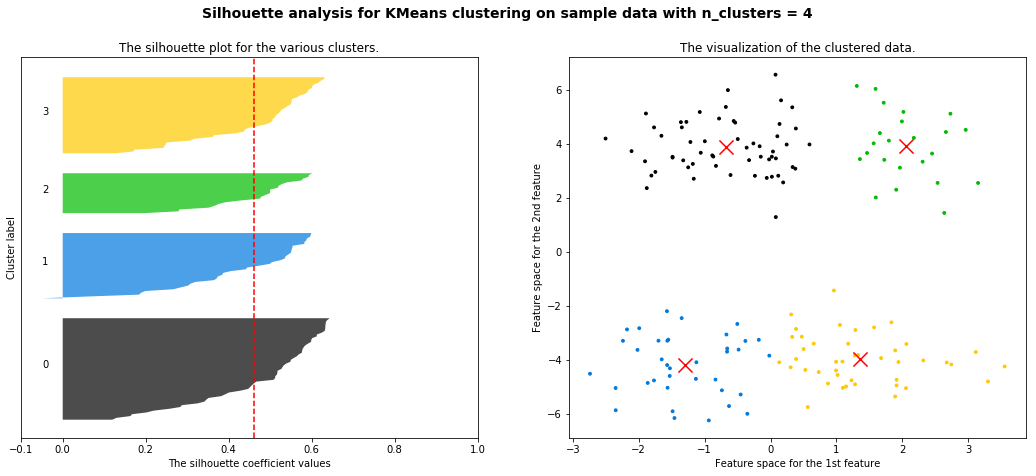

In [7]:
#先设定我们要分成的簇数
n_clusters = 4

#创建一个画布，画布上共有一行两列两个图
fig, (ax1, ax2) = plt.subplots(1, 2)

#画布尺寸
fig.set_size_inches(18, 7)

# 第一个图是我们的轮廓系数图像，是由各个簇的轮廓系数组成的横向条形图
# 横向条形图的横坐标是我们的轮廓系数取值，纵坐标是我们的每个样本，因为轮廓系数是对于每一个样本进行计算的

# 首先我们来设定横坐标
# 轮廓系数的取值范围在[-1,1]之间，但我们至少是希望轮廓系数要大于0的
# 太长的横坐标不利于我们的可视化，所以只设定X轴的取值在[-0.1,1]之间
ax1.set_xlim([-0.1, 1])

# 接下来设定纵坐标，通常来说，纵坐标是从0开始，最大值取到X.shape[0]的取值
# 但我们希望，每个簇能够排在一起，不同的簇之间能够有一定的空隙
# 以便我们看到不同的条形图聚合成的块，理解它是对应了哪一个簇
# 因此我们在设定纵坐标的取值范围的时候，在X.shape[0]上，加上一个距离(n_clusters + 1) * 10，留作间隔用
ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

# 开始建模，调用聚类好的标签
clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
cluster_labels = clusterer.labels_

# 调用轮廓系数分数，注意，silhouette_score生成的是所有样本点的轮廓系数均值
# 两个需要输入的参数是，特征矩阵X和聚类完毕后的标签
silhouette_avg = silhouette_score(X, cluster_labels)

#用print来报一下结果，现在的簇数量下，整体的轮廓系数究竟有多少
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# 调用silhouette_samples，返回每个样本点的轮廓系数，这就是我们的横坐标
sample_silhouette_values = silhouette_samples(X, cluster_labels)

#设定y轴上的初始取值
y_lower = 10

#接下来，对每一个簇进行循环
for i in range(n_clusters):
    # 从每个样本的轮廓系数结果中抽取出第i个簇的轮廓系数，并对他进行排序
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
    #注意, .sort()这个命令会直接改掉原数据的顺序
    ith_cluster_silhouette_values.sort()
    
    #查看这一个簇中究竟有多少个样本
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    
    #这一个簇在y轴上的取值，应该是由初始值(y_lower)开始，到初始值+加上这个簇中的样本数量结束(y_upper)
    y_upper = y_lower + size_cluster_i
    
    #colormap库中的，使用小数来调用颜色的函数
    #在nipy_spectral([输入任意小数来代表一个颜色])
    #在这里我们希望每个簇的颜色是不同的，我们需要的颜色种类刚好是循环的个数的种类
    #在这里，只要能够确保，每次循环生成的小数是不同的，可以使用任意方式来获取小数
    #在这里，我是用i的浮点数除以n_clusters，在不同的i下，自然生成不同的小数
    #以确保所有的簇会有不同的颜色
    color = cm.nipy_spectral(float(i)/n_clusters)
    
    #开始填充子图1中的内容
    #fill_between是填充曲线与直角之间的空间的函数
    #fill_betweenx的直角是在纵坐标上
    #fill_betweeny的直角是在横坐标上
    #fill_betweenx的参数应该输入(定义曲线的点的横坐标，定义曲线的点的纵坐标，柱状图的颜色)
    ax1.fill_betweenx(np.arange(y_lower, y_upper)
                      ,ith_cluster_silhouette_values
                      ,facecolor=color
                      ,alpha=0.7
                     )
    
    #为每个簇的轮廓系数写上簇的编号，并且让簇的编号显示坐标轴上每个条形图的中间位置
    #text的参数为(要显示编号的位置的横坐标，要显示编号的位置的纵坐标，要显示的编号内容)
    ax1.text(-0.05 , y_lower + 0.5 * size_cluster_i , str(i))

    # 为下一个簇计算新的y轴上的初始值，是每一次迭代之后，y的上线再加上10
    #以此来保证，不同的簇的图像之间显示有空隙
    y_lower = y_upper + 10
    
#给图1加上标题，横坐标轴，纵坐标轴的标签
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

#把整个数据集上的轮廓系数的均值以虚线的形式放入我们的图中
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#让y轴不显示任何刻度
ax1.set_yticks([])

#让x轴上的刻度显示为我们规定的列表
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#开始对第二个图进行处理，首先获取新颜色，由于这里没有循环，因此我们需要一次性生成多个小数来获取多个颜色
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

ax2.scatter(X[:, 0], X[:, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=colors
           )

#把生成的质心放到图像中去
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
            c="red", alpha=1, s=200)

#为图二设置标题，横坐标标题，纵坐标标题
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

#为整个图设置标题
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7192521933195322


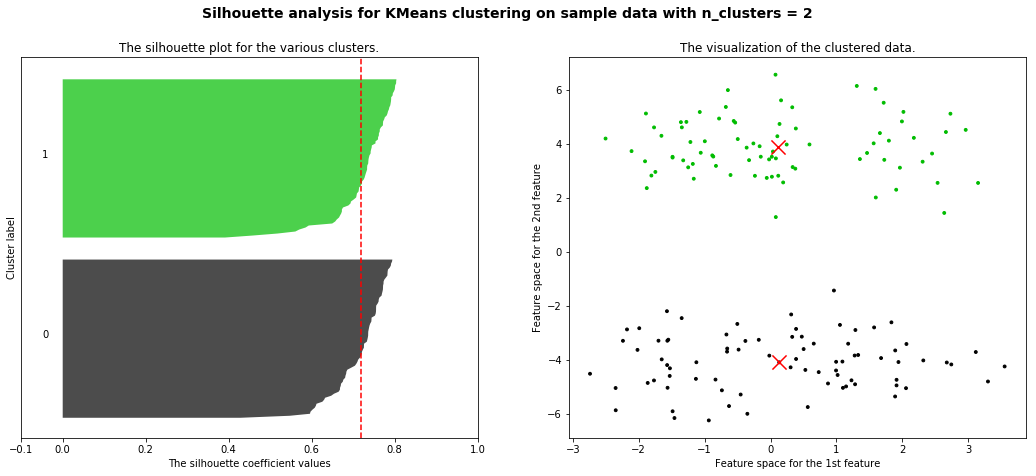

For n_clusters = 3 The average silhouette_score is : 0.5818027150492978


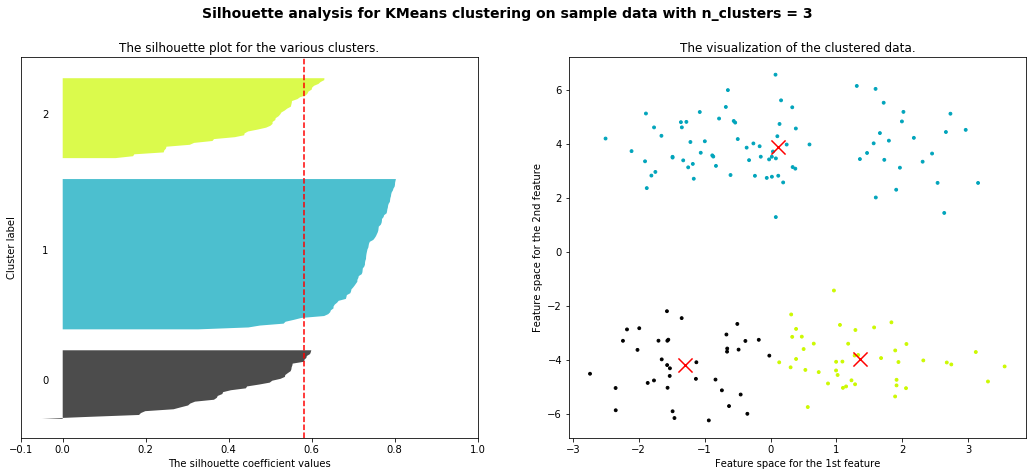

For n_clusters = 4 The average silhouette_score is : 0.4611842251070156


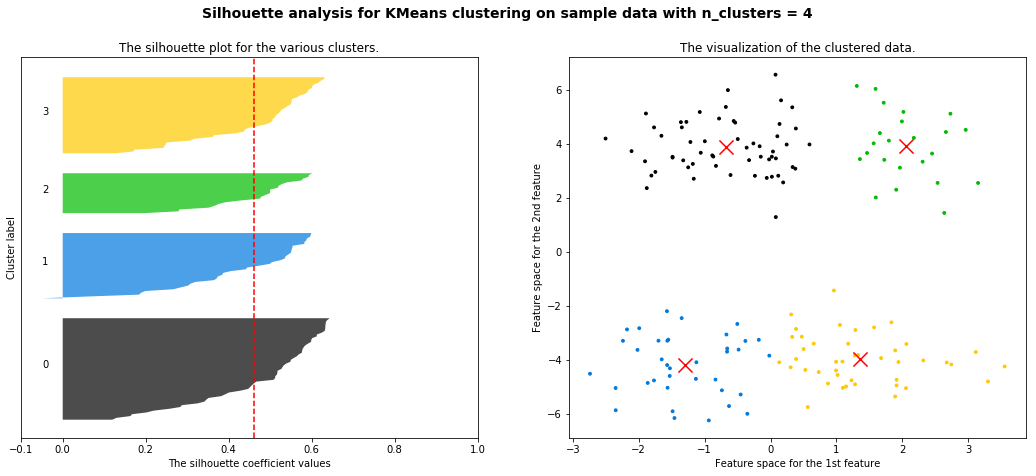

For n_clusters = 5 The average silhouette_score is : 0.4182903670097783


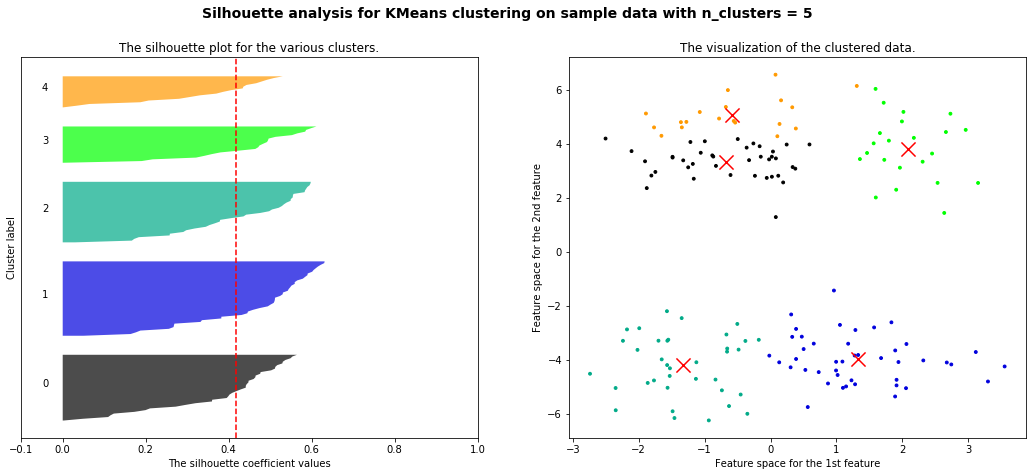

For n_clusters = 6 The average silhouette_score is : 0.39270517298275637


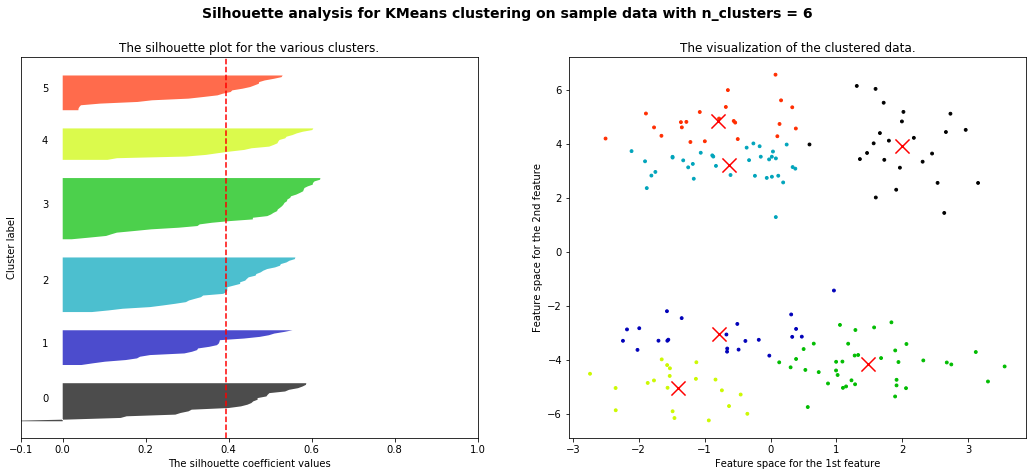

For n_clusters = 7 The average silhouette_score is : 0.3625927566285639


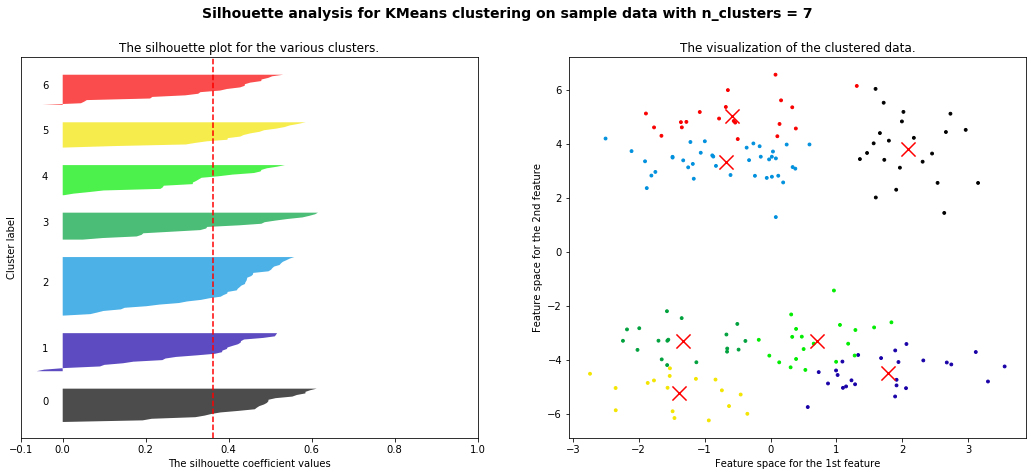

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
                ,marker='o'
                ,s=8
                ,c=colors
               )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

## 确定K值

确定k值的策略,可以通过尝试不同的k值绘制如下曲线:

- 绘制对应的误差平方和曲线,通过明显的拐点确定k值
- 绘制对应的平均轮廓系数曲线,找明显的尖峰,以确定k值

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# 加载求轮廓系数的函数
ss = []
sse = []
# 初始化存储轮廓系数的对象ss,存储误差平方和的对象sse
k = list(range(2,8))
# 确定簇中心个数k的取值范围
for i in k:
# 对于每个k值
    km = KMeans(n_clusters=i,random_state=1).fit(X)
    y_pred = km.predict(X)
    # 使用KMeans建模,并且拟合X数据,得到预测结果
    ss.append(silhouette_score(X,y_pred))
    # 计算相应的轮廓系数
    sse.append(km.inertia_)
    # 抽取模型结果中相应的误差平方和

Text(0, 0.5, 'Silhouettes Coefficient')

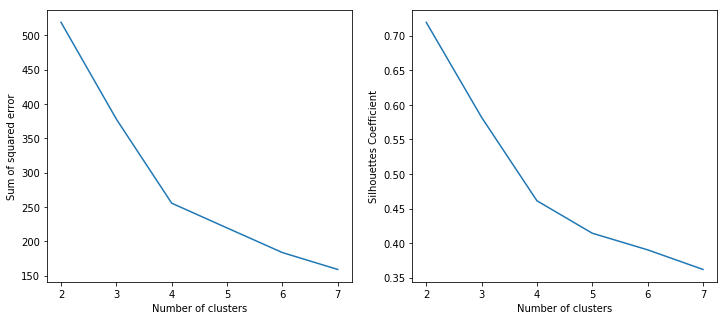

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(k,sse)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared error")
# 绘制左子图,得到误差平方和图形
plt.subplot(122)
plt.plot(k,ss)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouettes Coefficient")
# 绘制右子图,得到平均轮廓系数图形

# 图像的矢量化（案例）

In [11]:
from sklearn.datasets import load_sample_image

In [12]:
# 对两个序列中的点进行距离的匹配
from sklearn.metrics import pairwise_distances_argmin
# 洗牌
from sklearn.utils import shuffle

In [13]:
china=load_sample_image('china.jpg')

In [14]:
print(china.shape)#长度*宽度*像素
print(china.dtype)

(427, 640, 3)
uint8


In [15]:
#包含了多少种不同的颜色
newimage=china.reshape((427*640,3))
print(newimage.shape)

(273280, 3)


In [16]:
#包含多少个独一无二的颜色，去重
pd.DataFrame(newimage).drop_duplicates().shape

(96615, 3)

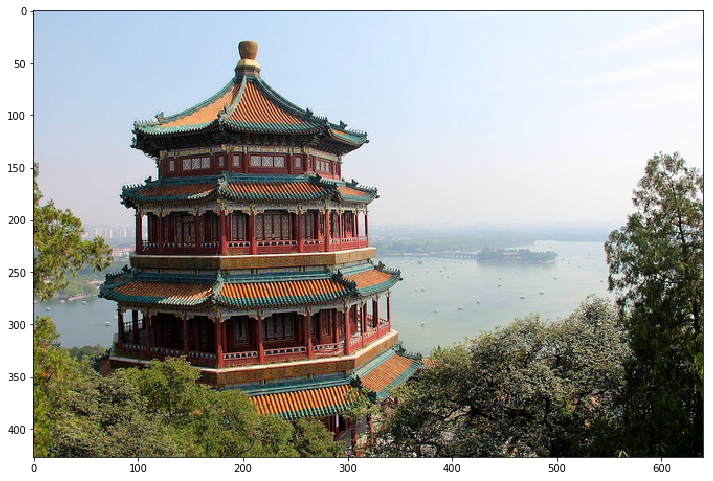

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(china)#导入三维数组形成的图片

In [18]:
#用KMeans将9万中颜色聚类成64种，并且不严重损坏图片的质量

#随机选取64个样本点作为随机质心

In [19]:
n_clusters=64
#归一化，plt.imshow在浮点数表现优秀
china=np.array(china,dtype=np.float64)/china.max()

In [20]:
w,h,d=original_shape=tuple(china.shape)

In [21]:
assert d==3
image_array=np.reshape(china,(w*h,d))#降维，变成二维数组
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [22]:
#首先，先使用1000个数据找出质心
image_array_sample=shuffle(image_array,random_state=0)[:1000]
#打乱随机取出1000个颜色
kmeans=KMeans(n_clusters=n_clusters,random_state=0).fit(image_array_sample)

In [23]:
#找出64个质心
kmeans.cluster_centers_

array([[0.62570806, 0.60261438, 0.53028322],
       [0.15546218, 0.1557423 , 0.12829132],
       [0.82063983, 0.89896801, 0.98462332],
       [0.42039216, 0.43843137, 0.2227451 ],
       [0.69527105, 0.74994233, 0.76516724],
       [0.92174422, 0.9556336 , 0.99514194],
       [0.07058824, 0.0754637 , 0.0508744 ],
       [0.28205128, 0.26395173, 0.19638009],
       [0.46509804, 0.43372549, 0.36901961],
       [0.71328976, 0.41960784, 0.31851852],
       [0.83529412, 0.86349206, 0.89505135],
       [0.76068627, 0.85617647, 0.9604902 ],
       [0.36372549, 0.36830065, 0.31405229],
       [0.34509804, 0.1654902 , 0.12901961],
       [0.53448674, 0.53264129, 0.50657439],
       [0.15098039, 0.24444444, 0.25228758],
       [0.56764706, 0.61993464, 0.6369281 ],
       [0.89411765, 0.63764706, 0.43529412],
       [0.58823529, 0.5630719 , 0.40588235],
       [0.60392157, 0.30326797, 0.25882353],
       [0.50784314, 0.31568627, 0.17908497],
       [0.0310856 , 0.0288857 , 0.01759923],
       [0.

In [24]:
#按照已存在的质心对所有的数据聚类
labels=kmeans.predict(image_array)
labels.shape

(273280,)

In [25]:
#使用质心来替换所有的样本
image_kmeans=image_array.copy()

In [26]:
image_kmeans#27w个样本点，

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [27]:
len(set(labels))

64

In [28]:
#取出样本所对应点质心
for i in range(w*h):
    image_kmeans[i]=kmeans.cluster_centers_[labels[i]]

In [29]:
#查看生成新图片的信息
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [30]:
#恢复图片结构
image_kmeans=image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

In [31]:
centroid_random=shuffle(image_array,random_state=0)[:n_clusters]
#随机选64个样本点
#函数（x1,x2,axis）
#用来计算x2中每个样本到x1每个样本的距离，并返回和x2相同的索引
#x1中对应的索引
labels_random=pairwise_distances_argmin(centroid_random,image_array,axis=0)

In [32]:
print(labels_random.shape)

print(len(set(labels_random)))

(273280,)
64


In [33]:
#用随机质心替换所有样本
image_random=image_array.copy()
for i in range(w*h):
    image_random[i]=centroid_random[labels_random[i]]
    
#恢复图片结构
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

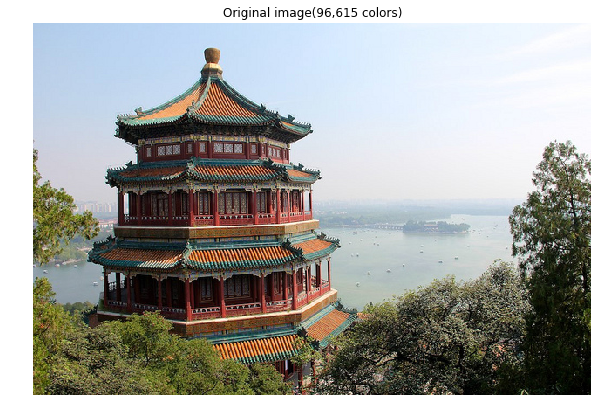

In [34]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image(96,615 colors)')
plt.imshow(china)

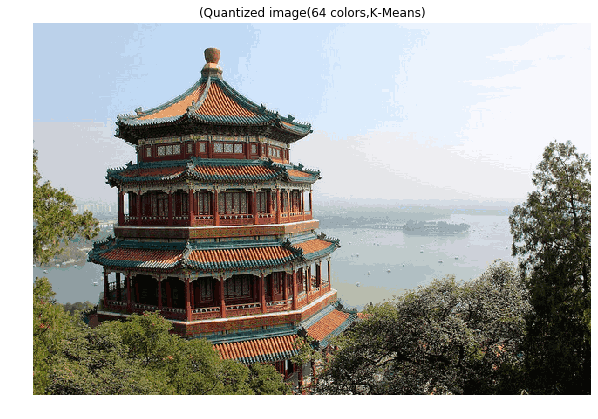

In [35]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('(Quantized image(64 colors,K-Means)')
plt.imshow(image_kmeans)

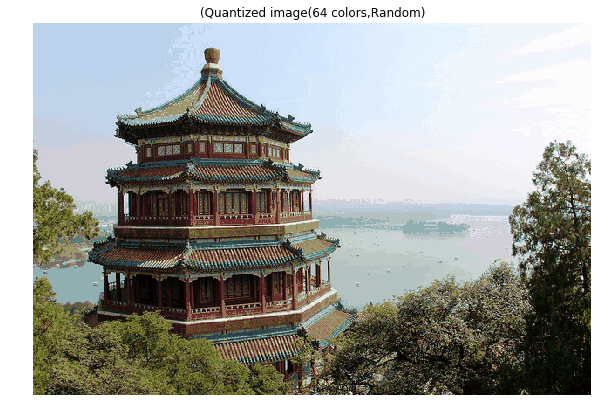

In [36]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('(Quantized image(64 colors,Random)')
plt.imshow(image_random)

# 基于密度的聚类算法：DBSCAN

In [37]:
from sklearn.datasets import make_moons
X,y=make_moons(200,noise=0.05,random_state=0)

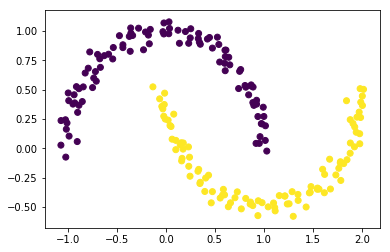

In [38]:
plt.scatter(X[:,0],X[:,1],c=y)

- 用KMeans

In [39]:
kmeans=KMeans(n_clusters=2).fit(X)

In [40]:
labels=kmeans.labels_
labels

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

In [41]:
centers=kmeans.cluster_centers_
centers

array([[-0.2003285 ,  0.58035606],
       [ 1.20736718, -0.0825517 ]])

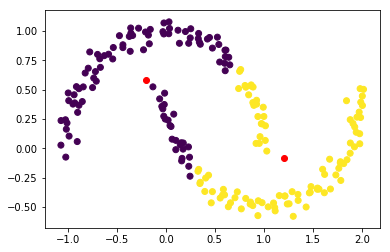

In [42]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.plot(centers[:,0],centers[:,1],'ro')

- 用DBSCAN

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
db=DBSCAN(eps=0.2,min_samples=5).fit(X)

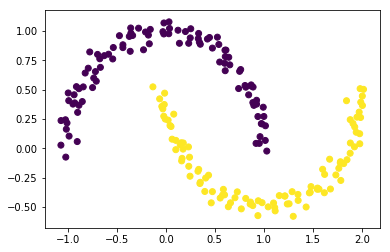

In [45]:
plt.scatter(X[:,0],X[:,1],c=db.labels_)

# 相似度和相异性的度量（补充）

- 相似度：常常在0（不相似）和1（完全相似）之间取值
- 相异度：可以在[0,1]或者[0,∞)中取值，距离可以作为相异度的度量指标
- 近邻度：表示相似性或相异性,两个对象之间的邻近度是两个对象每个对应属性之间的邻近度的函数

## 单个属性的对象之间的相似度和相异度

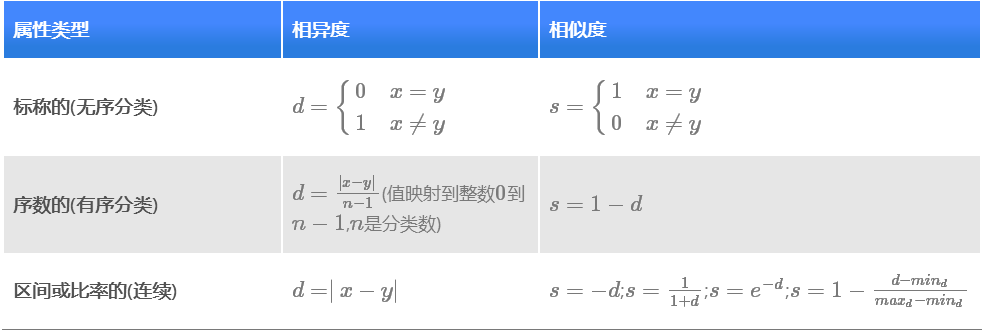

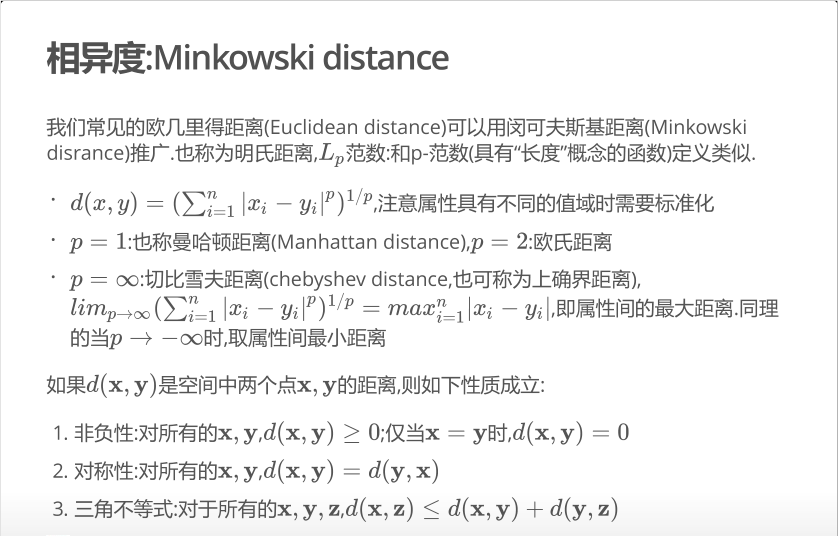

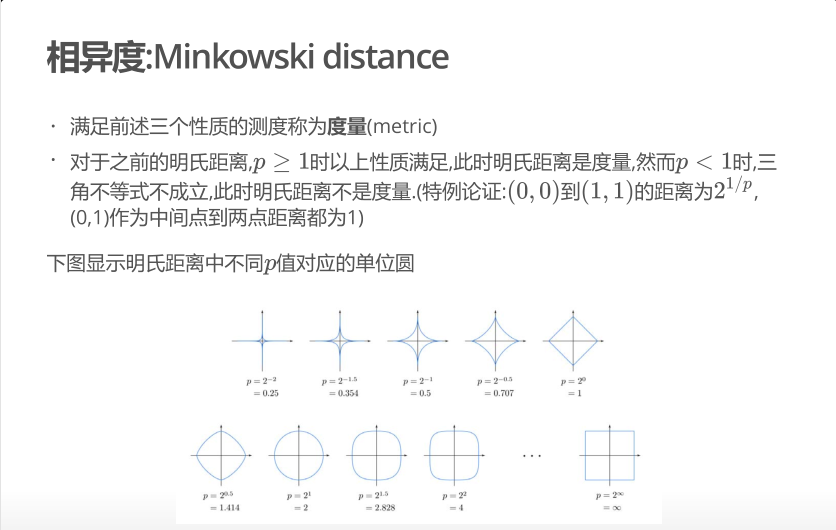

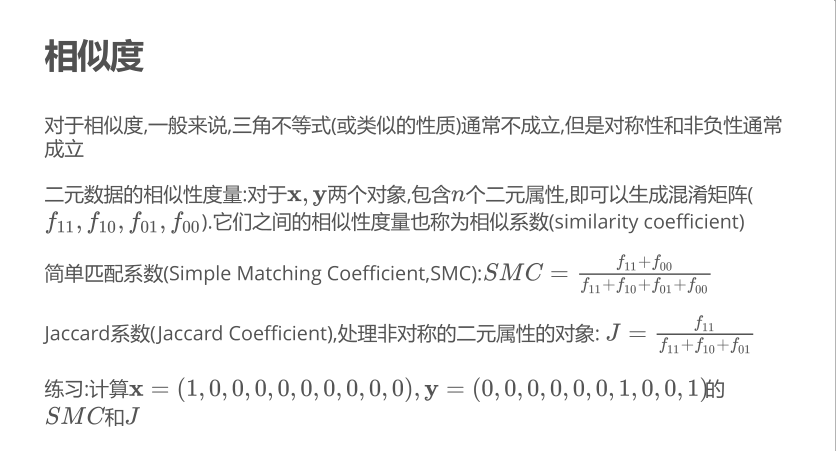

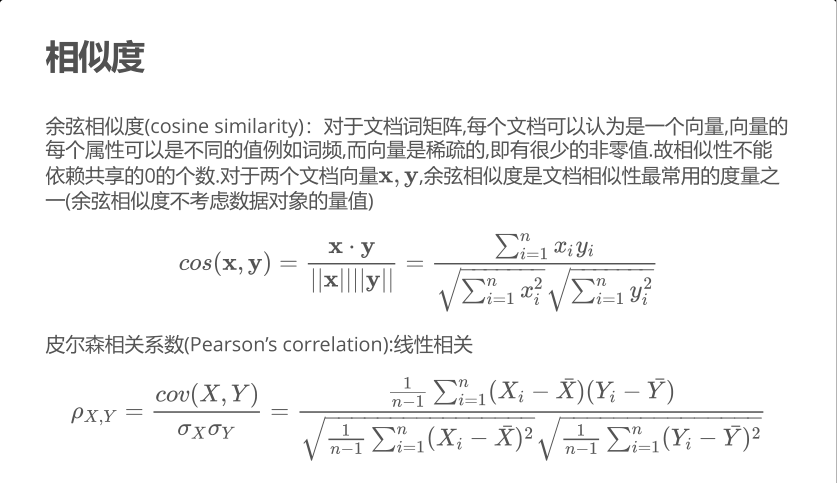

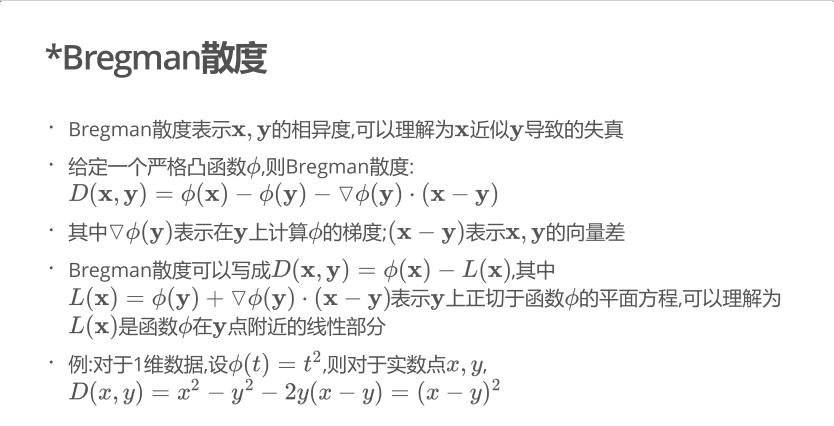

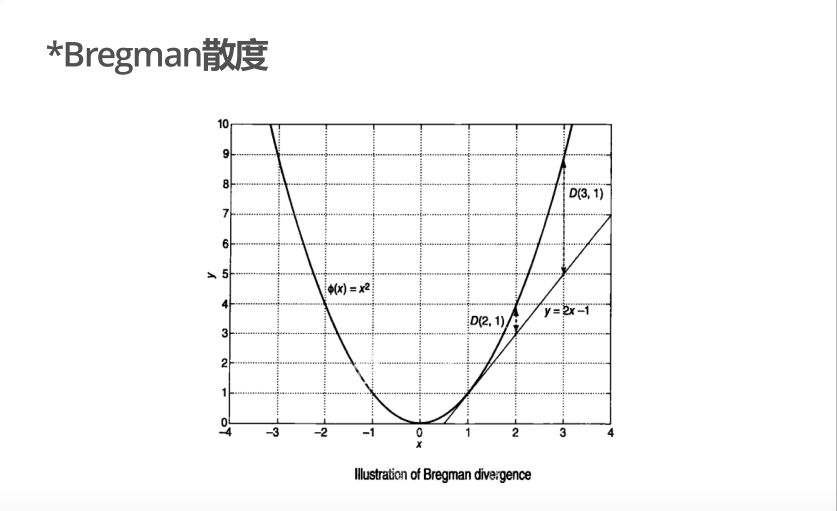

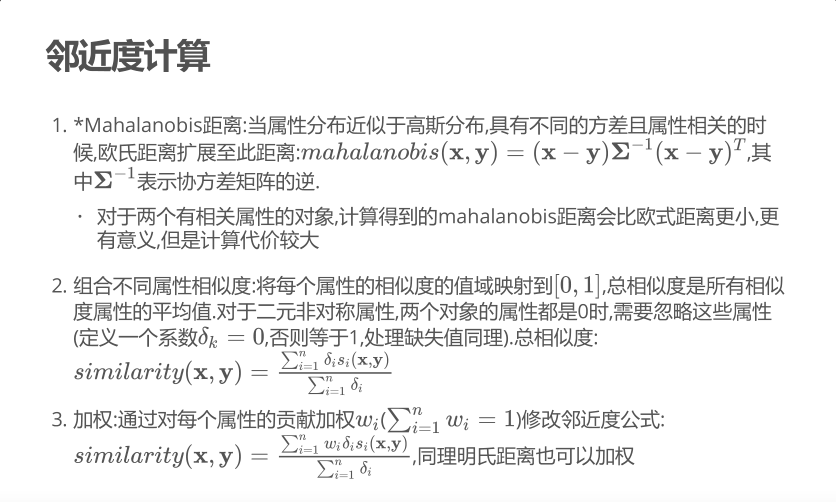